In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


2023-07-21 20:51:36.027350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-21 20:51:36.027382: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_house_sale = pd.read_csv('House Sales.csv')
print("The shape of the data: ", df_house_sale.shape)
df_house_sale.head()

The shape of the data:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df_house_sale.corr()['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


/tmp/ipykernel_58841/608549119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_house_sale.corr()['price'].sort_values(ascending=False))


In [4]:
df_house_sale.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# remove 'id' and 'zipcode' column
df_house_sale_0 = df_house_sale.drop('zipcode', axis=1)
df_house_sale_0 = df_house_sale_0.drop('id', axis=1)

df_house_sale_0['date'] = pd.to_datetime(df_house_sale_0['date'])

# convert date to month and year
df_house_sale_0['month'] = df_house_sale_0['date'].apply(lambda date: date.month)
df_house_sale_0['year'] = df_house_sale_0['date'].apply(lambda date: date.year)

df_house_sale_0 = df_house_sale_0.drop('date', axis=1)
df_house_sale_0.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [6]:
x = df_house_sale_0.drop('price', axis=1)
y = df_house_sale_0['price']

In [7]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [8]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
x_train = x_train.astype('float32')

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 15956 to 7311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17290 non-null  float32
 1   bathrooms      17290 non-null  float32
 2   sqft_living    17290 non-null  float32
 3   sqft_lot       17290 non-null  float32
 4   floors         17290 non-null  float32
 5   waterfront     17290 non-null  float32
 6   view           17290 non-null  float32
 7   condition      17290 non-null  float32
 8   grade          17290 non-null  float32
 9   sqft_above     17290 non-null  float32
 10  sqft_basement  17290 non-null  float32
 11  yr_built       17290 non-null  float32
 12  yr_renovated   17290 non-null  float32
 13  lat            17290 non-null  float32
 14  long           17290 non-null  float32
 15  sqft_living15  17290 non-null  float32
 16  sqft_lot15     17290 non-null  float32
 17  month          17290 non-null  float32
 18  yea

In [12]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (17290, 19)
y_train shape:  (17290,)
x_test shape:  (4323, 19)
y_test shape:  (4323,)


In [13]:
# normalization
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [14]:
# create model 
def model(input_shape):
    m = Sequential()
    m.add(Dense(units=128, activation='relu', input_shape=input_shape))
    m.add(Dense(units=128, activation='relu'))
    m.add(Dense(units=1))
    
    return m

In [15]:
m = model([x_train.shape[1]])
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


2023-07-21 20:51:43.473178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-21 20:51:43.473240: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-21 20:51:43.473279: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amir): /proc/driver/nvidia/version does not exist
2023-07-21 20:51:43.473803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
m.compile(loss='mse', optimizer='adam')

#### Training the model

In [17]:
hist = m.fit(x=x_train, y=y_train.values, batch_size=256, epochs=400, validation_split=0.2)

Epoch 1/400
55/55 [==============================] - 1s 10ms/step - loss: 426168614912.0000 - val_loss: 445354246144.0000
Epoch 2/400
55/55 [==============================] - 0s 6ms/step - loss: 426037739520.0000 - val_loss: 445049503744.0000
Epoch 3/400
55/55 [==============================] - 0s 5ms/step - loss: 425439068160.0000 - val_loss: 444030615552.0000
Epoch 4/400
55/55 [==============================] - 0s 6ms/step - loss: 423906246656.0000 - val_loss: 441812615168.0000
Epoch 5/400
55/55 [==============================] - 0s 6ms/step - loss: 420986322944.0000 - val_loss: 437945008128.0000
Epoch 6/400
55/55 [==============================] - 0s 6ms/step - loss: 416252067840.0000 - val_loss: 432036151296.0000
Epoch 7/400
55/55 [==============================] - 0s 6ms/step - loss: 409309413376.0000 - val_loss: 423709147136.0000
Epoch 8/400
55/55 [==============================] - 0s 5ms/step - loss: 399878520832.0000 - val_loss: 412763422720.0000
Epoch 9/400
55/55 [============

#### Plotting training loss  

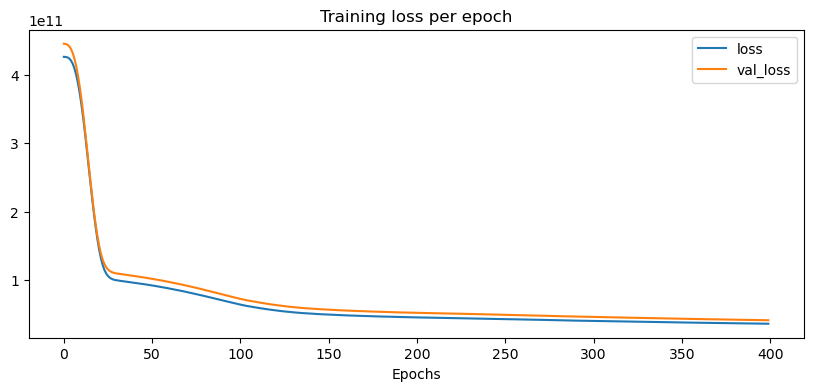

In [30]:
x_axis = range(len(hist.history['loss']))
_, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_axis, hist.history['loss'], label='loss')
ax.plot(x_axis, hist.history['val_loss'], label='val_loss')
ax.set_title("Training loss per epoch")
ax.set_xlabel("Epochs")
plt.legend()
plt.show()

In [45]:
single_house = x_test[0]
single_house = single_house.reshape(-1, 19)

In [46]:
single_house

array([[0.4       , 0.30434783, 0.26253298, 0.01574476, 0.4       ,
        0.        , 0.75      , 0.75      , 0.55555556, 0.22072678,
        0.10736196, 0.31304348, 0.98263027, 0.79459546, 0.36932305,
        0.36499742, 0.03209628, 0.81818182, 0.        ]])

In [52]:
y_test.iloc[0]

550000.0

In [53]:
print('Prediction Price: ', m.predict(single_house))
print('\nOriginal Price: ', y_test.iloc[0])

1/1 [==============================] - 0s 66ms/step
Prediction Price:  [[919645.94]]

Original Price:  550000.0
